In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

from scipy import stats
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
data_processed = pd.read_excel('/Users/ashutoshanand/Documents/UGP- Sanjiv/Dataset and Code files/Onion new Processed data.xlsx',index_col='Date')

In [8]:
data_processed

,W.sale Avg.Price,Inflation_rate,Growth_rate,Log_MS,Month,Year,Quarter,W.sale Avg.Price_1M_Lag,W.sale Avg.Price_3M_Lag,Inflation_rate_1M_Lag,...,Growth_rate_1M_Lag,Growth_rate_3M_Lag,Log_MS_1M_Lag,Log_MS_3M_Lag,Price_3M_Rolling_Mean,Price_6M_Rolling_Mean,Price_3M_Rolling_Std,Price_6M_Rolling_Std,Inflation_Growth_Interaction,seasonal_component
Date,,,,,,,,,,,,,,,,,,,,,
2000-06-01,401.0,5.238095,38.171534,16.281510,6,2000,2,369.0,350.0,5.011930,...,38.194843,30.215964,16.267717,16.235144,379.000000,383.333333,19.078784,39.174822,199.946120,0.763640
2000-07-01,486.0,4.952828,13.306099,16.281959,7,2000,3,401.0,367.0,5.238095,...,38.171534,27.288814,16.281510,16.261410,418.666667,388.500000,60.467622,50.828142,65.902813,0.920284
2000-08-01,460.0,3.990609,22.953398,16.288343,8,2000,3,486.0,369.0,4.952828,...,13.306099,38.194843,16.281959,16.267717,449.000000,405.500000,43.554563,55.435548,91.598023,1.104205
2000-09-01,512.0,3.496508,41.795593,16.303125,9,2000,3,460.0,401.0,3.990609,...,22.953398,38.171534,16.288343,16.281510,486.000000,432.500000,26.000000,62.054009,146.138613,1.209747
2000-10-01,596.0,2.746003,47.315842,16.319555,10,2000,4,512.0,486.0,3.496508,...,41.795593,13.306099,16.303125,16.281959,522.666667,470.666667,68.624583,81.185385,129.929446,1.361030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,1834.0,6.998158,-0.679758,19.165064,8,2022,3,1752.0,1271.0,6.707692,...,2.205323,19.721981,19.164157,19.147374,1733.666667,1630.666667,110.645078,338.348144,-4.757056,1.104205
2022-09-01,1672.0,7.414216,3.320463,19.166083,9,2022,3,1834.0,1615.0,6.998158,...,-0.679758,12.622150,19.165064,19.146480,1752.666667,1560.166667,81.002058,256.389872,24.618631,1.209747
2022-10-01,2290.0,6.767372,-4.074074,19.176894,10,2022,4,1672.0,1752.0,7.414216,...,3.320463,2.205323,19.166083,19.164157,1932.000000,1739.000000,320.443443,332.169836,-27.570773,1.361030


In [10]:
# Updated exogenous variables after feature engineering
exog_enhanced = data_processed.drop(['W.sale Avg.Price'], axis=1)
target_processed = data_processed['W.sale Avg.Price']

In [9]:
# Split data into training and testing sets (80-20 split)
train_size = int(len(data_processed) * 0.80)
train_target = target_processed[:train_size]
test_target = target_processed[train_size:]
train_exog = exog_enhanced[:train_size]
test_exog = exog_enhanced[train_size:]

In [11]:
from pmdarima import auto_arima

In [15]:
model = auto_arima(train_target,
                 start_p=0, max_p=5,
                 start_q=0, max_q=5,
                 d=None,  # Let the function determine differencing
                 start_P=0, max_P=2,
                 start_Q=0, max_Q=2,
                 D=None,  # Let the function determine seasonal differencing
                 m=12,    # Monthly seasonality
                 seasonal=True,
                 trace=True,  # Print model results during search
                 error_action='ignore',
                 suppress_warnings=True,
                 stepwise=False)  

print(model.summary())

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3211.875, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=3212.877, Time=0.16 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3186.333, Time=0.37 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=3212.062, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3191.966, Time=0.36 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3187.837, Time=0.64 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=3182.251, Time=0.44 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=3184.251, Time=0.51 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=3184.011, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3180.757, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3182.748, Time=0.17 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3161.710, Time=0.45 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3182.782, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=3163.391, Time=0.79 sec


In [11]:
sarimax_model = SARIMAX(
    train_target,
    exog=train_exog,
    order=(3, 1, 0),           # (p,d,q) for the non-seasonal part
    seasonal_order=(2, 0, 0, 12)  # (P,D,Q,s) for the seasonal part with s=12 for monthly data
)

# Fit the model
model_fit = sarimax_model.fit(disp=False)

# Print model summary
print(model_fit.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                   W.sale Avg.Price   No. Observations:                  216
Model:             SARIMAX(3, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1454.133
Date:                            Sat, 19 Apr 2025   AIC                           2960.266
Time:                                    23:26:51   BIC                           3047.902
Sample:                                06-01-2000   HQIC                          2995.675
                                     - 05-01-2018                                         
Covariance Type:                              opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Inflation_rate                  24.4397     24.535      0.996      0.319     -

In [13]:
# Forecast on test set
forecast = model_fit.get_forecast(steps=len(test_target), exog=test_exog)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


Mean Squared Error (MSE): 412182.28
Root Mean Squared Error (RMSE): 642.01
Mean Absolute Error (MAE): 426.97
Mean Absolute Percentage Error (MAPE): 19.00%
R-squared (R²): 0.8275


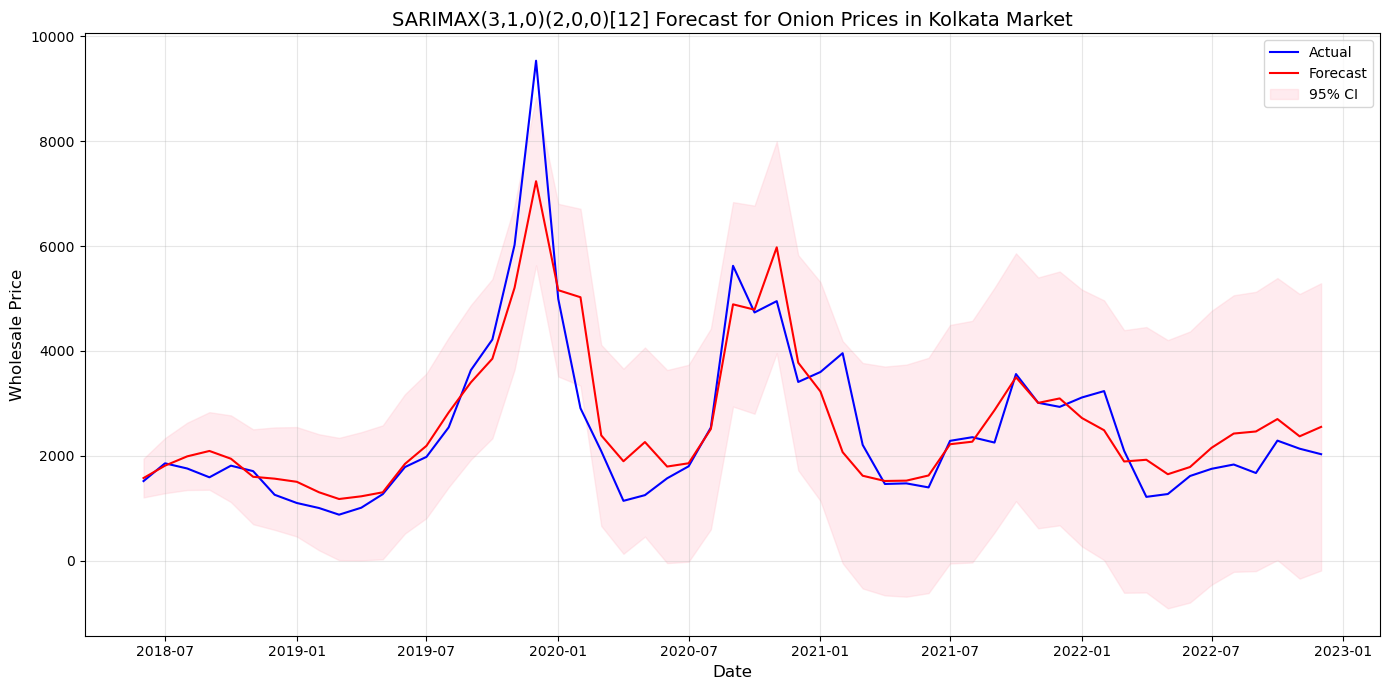

In [15]:
# Calculate performance metrics
mse = mean_squared_error(test_target, predicted_mean)
rmse = np.sqrt(mse)
r2 = r2_score(test_target, predicted_mean)
mae = mean_absolute_error(test_target, predicted_mean)
mape = np.mean(np.abs((test_target - predicted_mean) / test_target)) * 100


print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")

# Plot the results with 95% confidence interval
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label='Actual', color='blue')
plt.plot(test_target.index, predicted_mean, label='Forecast', color='red')
plt.fill_between(test_target.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% CI')

# Format the plot
plt.title('SARIMAX(3,1,0)(2,0,0)[12] Forecast for Onion Prices in Kolkata Market', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wholesale Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Significant Variables in the SARIMAX Model

Based on the **SARIMAX(3, 1, 0) × (2, 0, 0, 12)** model output, the following variables show **statistical significance** (p-value < 0.05) in predicting **wholesale average prices**:

---

## Primary Significant Variables

| Variable                     | Coefficient | p-value | Interpretation |
|-----------------------------|-------------|---------|----------------|
| `W.sale Avg.Price_1M_Lag`   | -0.4495     | 0.000   | Strong negative effect; suggests **price reversion** mechanisms. |
| `Price_3M_Rolling_Mean`     | 1.7651      | 0.000   | Strong positive influence; current prices influenced by **short-term trends**. |
| `Price_6M_Rolling_Mean`     | -1.1426     | 0.000   | Significant negative impact; points to **mean-reversion** over medium term. |
| `Price_3M_Rolling_Std`      | -0.1427     | 0.002   | **Short-term volatility** lowers current prices. |
| `Price_6M_Rolling_Std`      | 0.9699      | 0.000   | **Medium-term volatility** increases current prices. |
| `seasonal_component`        | 376.4498    | 0.013   | **Seasonal patterns** have strong influence. |

---

## Model Diagnostics

- **No serial correlation in residuals** (Ljung-Box p-value: **0.84**)
- **Heteroskedasticity present** (p-value: **0.00**)
- **Non-normal residuals** (Jarque-Bera p-value: **0.00**)

---

## Variables Approaching Significance (0.05 < p < 0.10)

| Variable                  | Coefficient | p-value | Note |
|--------------------------|-------------|---------|------|
| `Inflation_rate_3M_Lag`  | 36.3645     | 0.077   | Potential influence at **10% significance** level. |

---

## Non-Significant Variables (p-value > 0.05)

- `Current Inflation_rate`
- `Growth_rate`
- `Log_MS` (market share) variables
- `Calendar features`: `Month`, `Year`, `Quarter`
- Most **autoregressive terms** (`ar.L1`, `ar.L2`, etc.)

---


In [12]:
# Updated exogenous variables after feature engineering
exog_enhanced = exog_enhanced[['W.sale Avg.Price_1M_Lag', 
                        'Price_3M_Rolling_Mean', 
                        'Price_6M_Rolling_Mean',
                        'Price_3M_Rolling_Std', 
                        'Price_6M_Rolling_Std',
                        'seasonal_component',
                        'Inflation_rate_3M_Lag']]

In [14]:
# Split data into training and testing sets (80-20 split)
train_size = int(len(data_processed) * 0.80)
train_target = target_processed[:train_size]
test_target = target_processed[train_size:]
train_exog = exog_enhanced[:train_size]
test_exog = exog_enhanced[train_size:]

In [16]:
# Revised model with reduced AR terms and only significant predictors
revised_model = SARIMAX(
    train_target,
    exog=train_exog,
    order=(3, 1, 0),  # Remove AR terms, keep integration
    seasonal_order=(2, 0, 0, 12),  # Remove seasonal AR terms
)

# Fit the model
revised_fit = revised_model.fit(disp=False)
print(revised_fit.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                   W.sale Avg.Price   No. Observations:                  216
Model:             SARIMAX(3, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1422.585
Date:                            Sat, 19 Apr 2025   AIC                           2871.169
Time:                                    23:50:06   BIC                           2914.987
Sample:                                06-01-2000   HQIC                          2888.874
                                     - 05-01-2018                                         
Covariance Type:                              opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
W.sale Avg.Price_1M_Lag    -0.4598      0.045    -10.146      0.000      -0.549      -0.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
# Forecast on test set
forecast = revised_fit.get_forecast(steps=len(test_target), exog=test_exog)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


Mean Squared Error (MSE): 386447.50
Root Mean Squared Error (RMSE): 621.65
Mean Absolute Error (MAE): 387.56
Mean Absolute Percentage Error (MAPE): 14.83%
R-squared (R²): 0.8383


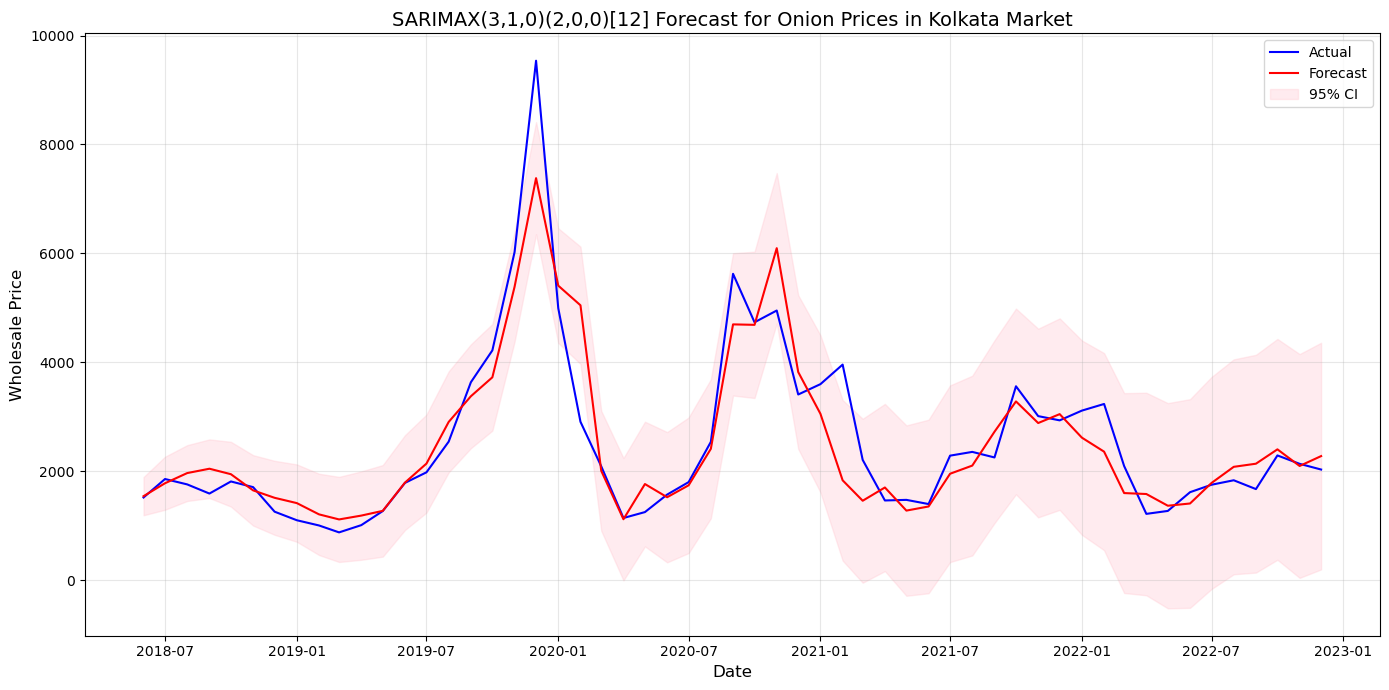

In [21]:
# Calculate performance metrics
mse = mean_squared_error(test_target, predicted_mean)
rmse = np.sqrt(mse)
r2 = r2_score(test_target, predicted_mean)
mae = mean_absolute_error(test_target, predicted_mean)
mape = np.mean(np.abs((test_target - predicted_mean) / test_target)) * 100


print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")

# Plot the results with 95% confidence interval
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label='Actual', color='blue')
plt.plot(test_target.index, predicted_mean, label='Forecast', color='red')
plt.fill_between(test_target.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% CI')

# Format the plot
plt.title('SARIMAX(3,1,0)(2,0,0)[12] Forecast for Onion Prices in Kolkata Market', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wholesale Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
